In [1]:
import numpy as np
import math
import csv
import time

import queue
from statistics import mean
import matplotlib.pyplot as plt
import random
import statistics
import scipy.stats as sct
from tabulate import tabulate
from scipy.sparse import csr_matrix,csc_matrix,lil_matrix

import pickle

0.09
19
Run time --- 7.196859836578369 seconds ---
0.18
25
Run time --- 7.96586275100708 seconds ---
0.27
30
Run time --- 8.77756953239441 seconds ---
0.36
51
Run time --- 11.117867708206177 seconds ---
0.44999999999999996
75
Run time --- 14.164668083190918 seconds ---
0.54
99
Run time --- 17.297901153564453 seconds ---
0.63
122
Run time --- 20.842201709747314 seconds ---
0.72
147
Run time --- 23.830010414123535 seconds ---
0.8099999999999999
172
Run time --- 27.586740255355835 seconds ---
0.8999999999999999
200
Run time --- 30.65239453315735 seconds ---
0.99
234
Run time --- 35.05946230888367 seconds ---
1.08
276
Run time --- 41.161876916885376 seconds ---
1.17
338
Run time --- 50.19664287567139 seconds ---
1.26
437
Run time --- 63.47191047668457 seconds ---
1.3499999999999999
634
Run time --- 88.69576358795166 seconds ---
1.44
1236
Run time --- 172.78027486801147 seconds ---
1.53
5450
Run time --- 742.0015795230865 seconds ---
1.6199999999999999
1138
Run time --- 157.45903730392456 s

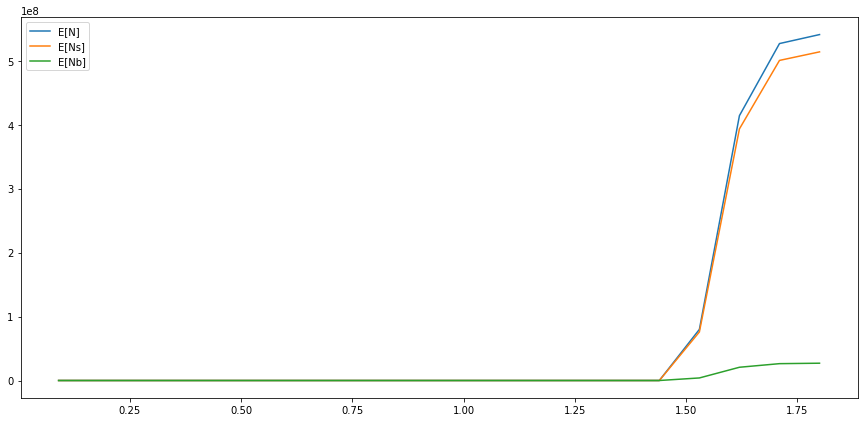

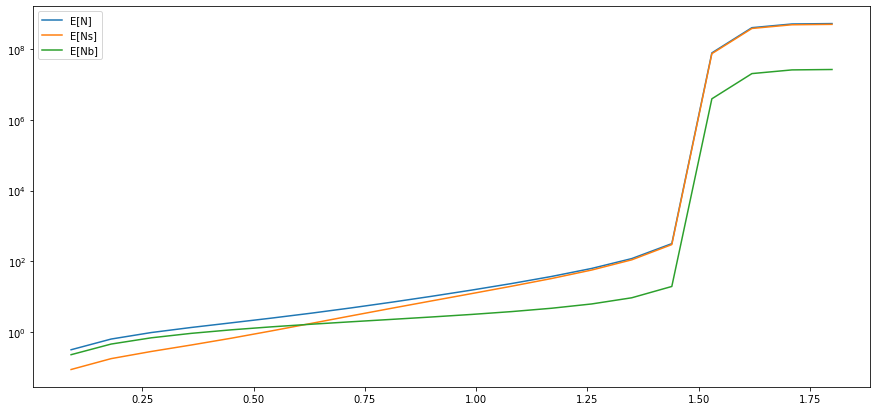

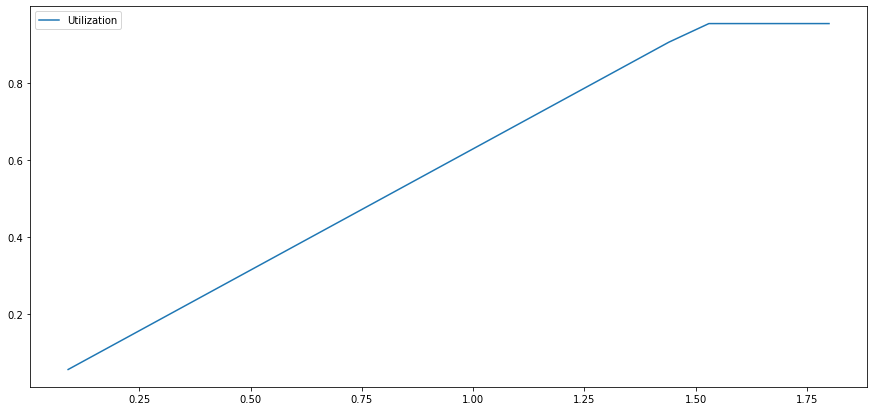

0.045
19
Run time --- 16.080307722091675 seconds ---
0.09
26
Run time --- 19.129329919815063 seconds ---
0.135
31
Run time --- 20.66865372657776 seconds ---
0.18
35
Run time --- 20.911083459854126 seconds ---
0.22499999999999998
40
Run time --- 22.440237522125244 seconds ---
0.27
46
Run time --- 24.69381308555603 seconds ---
0.315
65
Run time --- 30.662888526916504 seconds ---
0.36
90
Run time --- 38.93134069442749 seconds ---
0.40499999999999997
116
Run time --- 47.41180968284607 seconds ---
0.44999999999999996
142
Run time --- 55.59253263473511 seconds ---
0.495
169
Run time --- 64.44119429588318 seconds ---
0.54
198
Run time --- 73.5332624912262 seconds ---
0.585
229
Run time --- 83.98254108428955 seconds ---
0.63
267
Run time --- 96.08809924125671 seconds ---
0.6749999999999999
327
Run time --- 115.792635679245 seconds ---
0.72
548
Run time --- 187.51699447631836 seconds ---
0.765
1733
Run time --- 568.8879210948944 seconds ---
0.8099999999999999
461
Run time --- 153.82593941688538

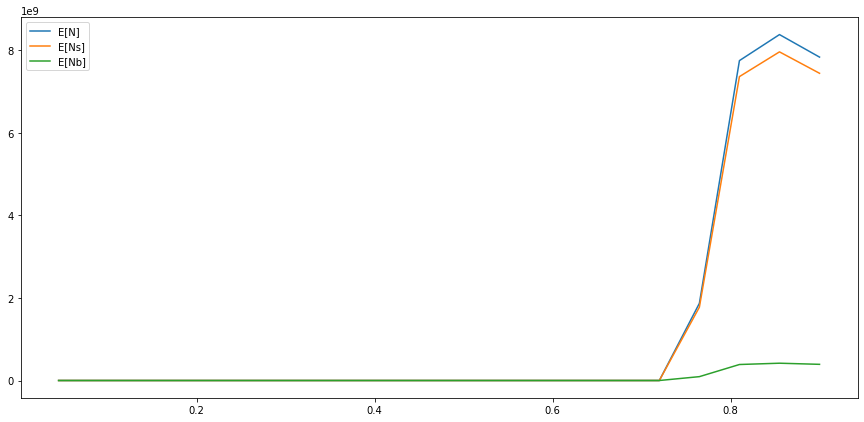

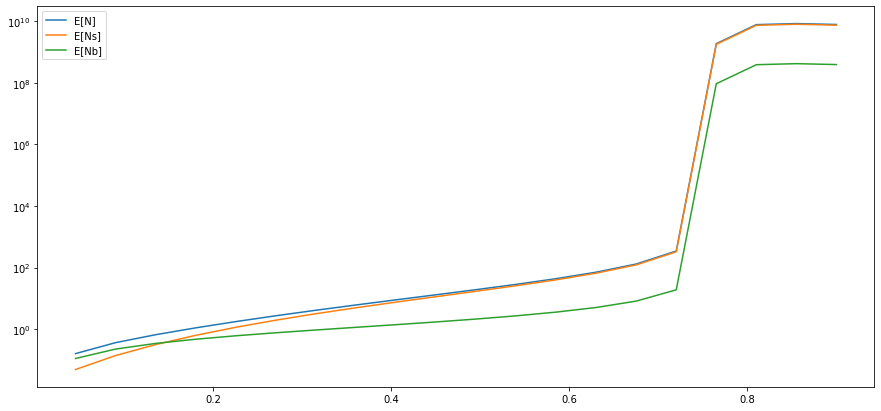

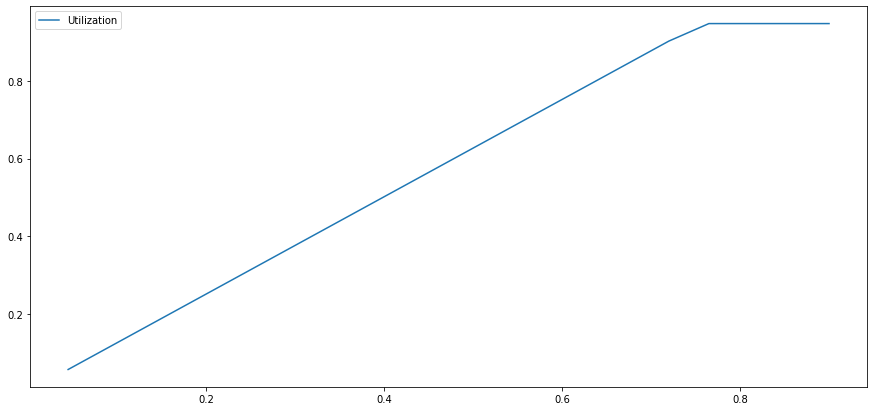

0.0225
20
Run time --- 29.94078540802002 seconds ---
0.045
26
Run time --- 35.53135800361633 seconds ---
0.0675
31
Run time --- 37.4788281917572 seconds ---
0.09
36
Run time --- 41.11278963088989 seconds ---
0.11249999999999999
42
Run time --- 45.886746883392334 seconds ---
0.135
48
Run time --- 50.171141386032104 seconds ---
0.1575
54
Run time --- 54.87828230857849 seconds ---
0.18
62
Run time --- 60.634011030197144 seconds ---
0.20249999999999999
71
Run time --- 67.61864757537842 seconds ---
0.22499999999999998
82
Run time --- 76.1431896686554 seconds ---
0.2475
96
Run time --- 85.80315279960632 seconds ---
0.27
116
Run time --- 101.07771492004395 seconds ---
0.2925
144
Run time --- 121.65404176712036 seconds ---
0.315
191
Run time --- 156.55009579658508 seconds ---
0.33749999999999997
283
Run time --- 225.04800868034363 seconds ---
0.36
589
Run time --- 447.29502415657043 seconds ---
0.3825
1714
Run time --- 1286.2476511001587 seconds ---
0.40499999999999997
394
Run time --- 302.524

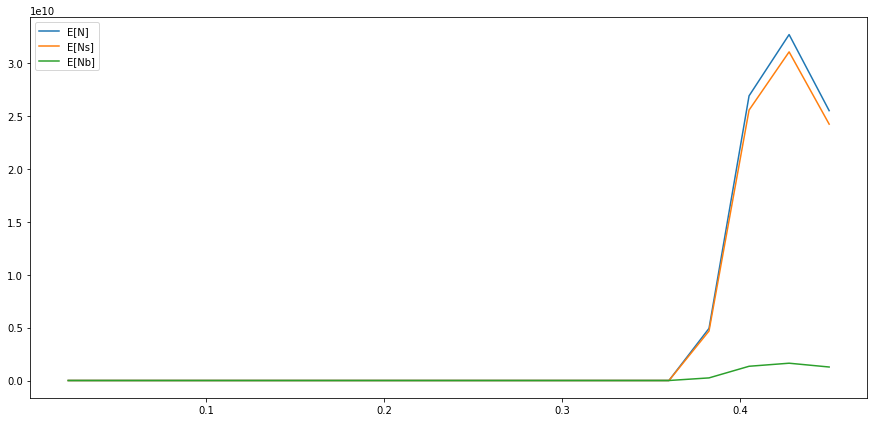

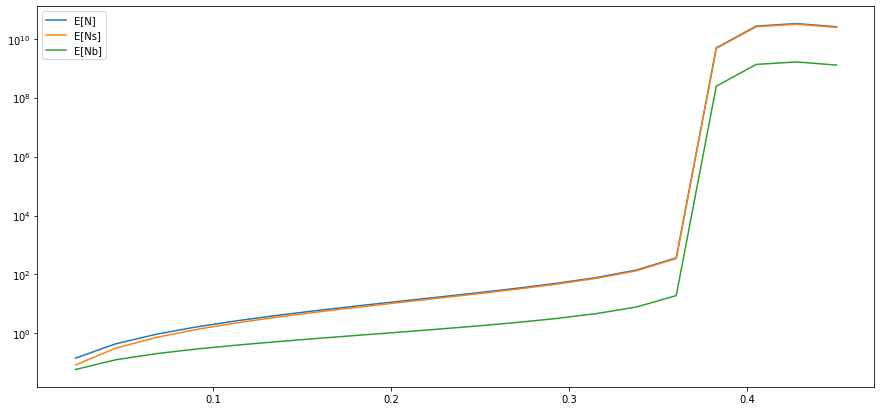

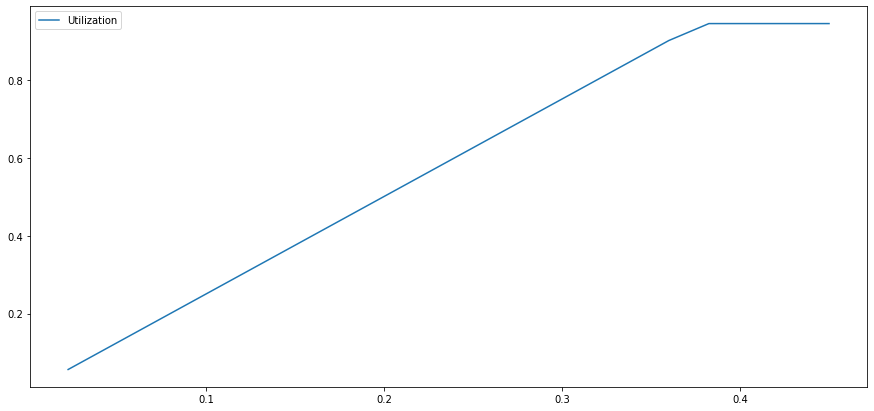

Done writing list into a binary file


In [3]:
mu_s = 1
measurements = []
for N in [256]:    
    for T in [N//4,N//2,N]:
        for pb in [0.05]:
            ps = 1-pb
            for mu_b in [0.02]:
                #N = 100
                #T = round(N/10)
                #pb = 0.2
                #ps = 1-pb
                #mu_b = 0.01
                
                start_sim = time.time()

                arr_rate_limit = 0.45#1/((ps/mu_s)+(pb/mu_b)) ##
                arr_rate_limit *= (N/T)
                results = []
                stable = True
                stable_limit = 0
                
                arr_rate_range = np.arange(0,arr_rate_limit*1.01,(arr_rate_limit)/20)[1:]
                #arr_rate_range = np.arange(1,1.801,0.1)
                #arr_rate_range = arr_rate_range[:18]

                for arr_rate in arr_rate_range:
                    start_run = time.time()
                    print(arr_rate)
                    lambda_s = (arr_rate*ps)
                    lambda_b = (arr_rate*pb)
                    

                    d1 = round(N + ((N*N)/(2*T)) - (N/2) + (N/T) + 1)
                    d2 = round((T)*(N/T) + 1)
                    #print(d1)
                    #print(d2)

                    q_dim = d1+(d2*(T+2))
                    q = lil_matrix((q_dim,q_dim))
                    #q = csc_matrix(q)
                    #print(q)

                    def access_q(n1,s1,b1,n2,s2,b2):
                        global q
                        if n1 == 0:
                            pass
                        elif n2 == 0:
                            pass
                        elif n1 == T+1:
                            pass
                        else:
                            return ((-1,-1))

                        q_dim = ((q.shape[0]-d1)/d2)

                        row = access_map[(s1,b1)]
                        col = access_map[(s2,b2)]
                        if (n1>0):
                            row = d1 + ((n1-1)*d2) + access_map_v2[(s1,b1)]
                        if (n2>0):
                            col = d1 + ((n2-1)*d2) + access_map_v2[(s2,b2)]
                        return((row,col))


                    access_map = dict()
                    i = 0
                    for s in range(N+1):
                        for b in range(round(N/T)+1):
                            if (s+(b*T)) <= N:
                                access_map[(s,b)] = i
                                i = i+1

                    access_map_v2 = dict()
                    i = 0
                    for s in range(N+1):
                        for b in range(round(N/T)+1):
                            if (s+(b*T)) > (N-T) and (s+(b*T)) <= N:
                                access_map_v2[(s,b)] = i
                                i = i+1

                    def init_transitions_arr(dim):
                        global q
                        for n in range(dim):
                            for s in range(N+1):
                                for b in range (N+1):

                                    if n > 0 and (s,b) in access_map_v2:
                                        r,c = access_q(n,s,b, n+1,s,b)
                                        q[r,c] = arr_rate
                                    elif n == 0:
                                        if (s+(b*T)) == N:
                                            r,c = access_q(0,s,b, 1,s,b)
                                            q[r,c] = arr_rate
                                        elif (s+(b*T)) <= (N-T):
                                            r,c = access_q(0,s,b, 0,s+1,b)
                                            q[r,c] = lambda_s
                                            r,c = access_q(0,s,b, 0,s,b+1)
                                            q[r,c] = lambda_b
                                        elif (s+(b*T)) > (N-T) and (s+(b*T)) < N:
                                            r,c = access_q(0,s,b, 0,s+1,b)
                                            q[r,c] = lambda_s
                                            r,c = access_q(0,s,b, 1,s,b)
                                            q[r,c] = lambda_b

                    def init_transitions_srv(dim):
                        global q
                        for n in range(dim):
                            for s in range(N+1):
                                for b in range (N+1):
                                    F = N - (b*T) - s

                                    if n > 0 and (s+(b*T)) == N:
                                        K = min(n,T)
                                        if s > 0:
                                            r,c = access_q(n,s,b, n-1,s,b)
                                            q[r,c] = q[r,c] + (s*mu_s*ps)

                                            r,c = access_q(n,s,b, n,s-1,b)
                                            q[r,c] = q[r,c] + (s*mu_s*pb)
                                        if b > 0:
                                            r,c = access_q(n,s,b, n-1,s,b)
                                            q[r,c] = q[r,c] + (b*mu_b*pb)

                                            for i in range(1,K):
                                                r,c = access_q(n,s,b, n-i,s+i,b-1)
                                                q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                                            r,c = access_q(n,s,b, n-K,s+K,b-1)
                                            q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))


                                    elif n > 0 and F > 0 and F < (T-1):
                                        K = min(F,n-1)
                                        if s > 0:
                                            r,c = access_q(n,s,b, n,s-1,b)
                                            q[r,c] = q[r,c] + (s*mu_s)
                                        if b > 0:
                                            for i in range(0,K):
                                                r,c = access_q(n,s,b, n-i-1,s+i,b)
                                                q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                                            r,c = access_q(n,s,b, n-K-1,s+K,b)
                                            q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))

                                    elif n > 0 and F == (T-1):
                                        K = min(F,n-1)
                                        if s > 0:
                                            r,c = access_q(n,s,b, n-1,s-1,b+1)
                                            q[r,c] = q[r,c] + (s*mu_s)
                                        if b > 0:
                                            for i in range(0,K):
                                                r,c = access_q(n,s,b, n-i-1,s+i,b)
                                                q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                                            r,c = access_q(n,s,b, n-K-1,s+K,b)
                                            q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))

                                    elif n == 0 and (s+(b*T)) <= N:
                                        if s > 0:
                                            r,c = access_q(0,s,b, 0,s-1,b)
                                            q[r,c] = q[r,c] + (s*mu_s)
                                        if b > 0:
                                            r,c = access_q(0,s,b, 0,s,b-1)
                                            q[r,c] = q[r,c] + (b*mu_b)

                    def fill_diagonal():
                        for i in range(q.shape[0]):
                            q[i,i] = -(np.sum(q[i])-q[i,i])


                    init_transitions_arr(T+2)
                    init_transitions_srv(T+2)
                    fill_diagonal()

                    #q = csr_matrix(q).toarray()

                    diag = d1 + (d2*T)

                    Bs = []
                    for i in range(1,T+1):
                        block = q[diag:diag+d2, diag-(d2*i):diag-(d2*i)+d2].toarray()
                        Bs.append(block)

                    L = q[diag:diag+d2, diag:diag+d2].toarray()
                    F = q[diag:diag+d2, diag+d2:diag+d2+d2].toarray()
                    L_prime = q[0:d1,0:d1].toarray()
                    F_prime = q[0:d1,d1:d1+d2].toarray()
                    Bs_prime = [q[d1:d1+d2,0:d1].toarray()]
                    for i in range(T-1):
                        Bs_prime.append(q[d1+((i+1)*d2) : d1+((i+1)*d2)+d2 , 0:d1].toarray())


                    L_inv = np.linalg.inv(L)
                    V = np.matmul(F,L_inv)
                    Ws = []
                    for B in Bs:
                        W = np.matmul(B,L_inv)
                        Ws.append(W)
                    Ws

                    Rs = [np.zeros((d2,d2))]
                    diff = 1
                    i = 0
                    while diff > 1e-12:    
                        R = -V
                        j = 2
                        for W in Ws:
                            R = np.subtract(R,np.matmul(np.linalg.matrix_power(Rs[i],j),W))
                            j += 1
                        diff = R[0][0] - Rs[-1][0][0]
                        Rs.append(R)
                        i += 1
                    R = Rs[-1]
                    print(len(Rs))

                    #
                    tl = L_prime
                    tr = F_prime
                    bl = Bs_prime[0]
                    for i in range(1,len(Bs_prime)):
                        b = Bs_prime[i]
                        bl = np.add(bl,np.matmul(np.linalg.matrix_power(R,i),b))
                    br = L
                    #i = 1
                    for i in range(len(Bs)):
                        b = Bs[i]
                        br = np.add(br,np.matmul(np.linalg.matrix_power(R,i+1),b))
                    '''for b in Bs:
                        br = np.add(br,np.matmul(np.linalg.matrix_power(R,i),b))
                        i += 1'''


                    #
                    bc = np.append(tl,tr,axis=1)
                    bcb = np.append(bl,br,axis=1)
                    bc = np.append(bc,bcb,axis=0)
                    bc[0][-1] = 1
                    for r in bc[1:]:
                        r[-1] = 0

                    #
                    a = np.transpose(bc)
                    b = np.zeros(d1+d2)
                    b[-1] = 1
                    pi = np.linalg.solve(a,b)

                    #
                    ir = np.linalg.inv(np.subtract(np.identity(R.shape[0]),R))
                    r = np.matmul(pi[d1:],ir)
                    alfa = np.sum(pi[:d1]) + np.sum(r)
                    pi = pi/alfa
                    pis = [pi[:d1],pi[d1:]]
                    for i in range(2,max(N,100)):
                        pis.append(np.matmul(pis[i-1],R))

                    '''if stable == True and check_stability() == False:
                        stable = False
                        stable_limit = arr_rate'''

                    mLz = np.array([
                        [s[0] for s in access_map],
                        [s[1] for s in access_map]
                    ])
                    mL_t = []
                    mL_b = []
                    for s in access_map_v2:
                        if s[0] + (s[1]*T) < N:
                            mL_t.append(s[0])
                            mL_b.append(s[1]+1) #HOL
                        elif s[0] + (s[1]*T) == N:
                            mL_t.append(s[0] + ps)
                            mL_b.append(s[1] + pb)
                    mL = np.array([
                        mL_t,
                        mL_b
                    ])

                    Nl = np.matmul(mLz,pis[0])

                    Nrl = np.matmul(np.transpose(pis[1]),np.matmul(R,np.linalg.matrix_power(np.subtract(np.identity(R.shape[0]),R),-2)))
                    Nrl = np.sum(Nrl)
                    Nrl = np.array([ps,pb])*Nrl

                    Nrr = np.matmul(np.transpose(pis[1]),np.linalg.inv(np.subtract(np.identity(R.shape[0]),R)))

                    Nrr = np.matmul(mL,np.transpose(Nrr))

                    Nr = np.add(Nrl,Nrr)
                    N_ao = np.add(Nl,Nr)

                    '''Nwb = 0
                    Nws = 0
                    Nsb = 0
                    Nss = 0
                    n = 1
                    for sp in pis[1:]:
                        i = 0
                        for s in access_map_v2:
                            if s[0] + (s[1]*T) < N:
                                Nwb += sp[i]*(1+((n-1)*pb))
                                Nws += sp[i]*((n-1)*ps)
                            elif s[0] + (s[1]*T) == N:
                                Nwb += sp[i]*n*pb
                                Nws += sp[i]*n*ps

                            Nsb += sp[i]*s[1]
                            Nss += sp[i]*s[0]

                            i += 1
                        n += 1

                    Nw = np.array([Nws, Nwb])

                    #Ns for n = 0
                    i = 0
                    for s in access_map:
                        Nsb += pis[0][i]*s[1]
                        Nss += pis[0][i]*s[0]
                        i += 1

                    #N, total
                    Nb = Nwb+Nsb
                    Ns = Nws+Nss'''

                    #T
                    RT = np.sum(N_ao)/arr_rate
                    RTs = N_ao[0]/lambda_s
                    RTb = N_ao[1]/lambda_b
                    
                    #Utilization
                    Ht = []
                    Hb = []
                    for s in access_map_v2:
                        Ht.append(s[0])
                        Hb.append(s[1])
                    H = np.array([
                        Ht,
                        Hb
                    ])

                    Bl = np.matmul(mLz,pis[0])
                    Bl = np.matmul(Bl,np.array([1,T]))

                    Br = np.matmul(np.transpose(pis[1]),np.linalg.inv(np.subtract(np.identity(R.shape[0]),R)))
                    Br = np.matmul(Br,np.transpose(H))
                    Br = np.matmul(Br,np.array([1,T]))

                    B = Bl + Br

                    U = B/N
                    
                    #Ns

                    Nsl = np.matmul(mLz,pis[0])

                    Nsr = np.matmul(np.transpose(pis[1]),np.linalg.inv(np.subtract(np.identity(R.shape[0]),R)))
                    Nsr = np.matmul(Nsr,np.transpose(H))

                    Nst = np.add(Nsl,Nsr)

                    #Nw

                    mLw_t = []
                    mLw_b = []
                    for s in access_map_v2:
                        if s[0] + (s[1]*T) < N:
                            mLw_t.append(0)
                            mLw_b.append(1) #HOL
                        elif s[0] + (s[1]*T) == N:
                            mLw_t.append(ps)
                            mLw_b.append(pb)
                    mLw = np.array([
                        mLw_t,
                        mLw_b
                    ])

                    Nwl = Nrl

                    Nwr = np.matmul(np.transpose(pis[1]),np.linalg.inv(np.subtract(np.identity(R.shape[0]),R)))

                    Nwr = np.matmul(mLw,np.transpose(Nwr))

                    Nwt = np.add(Nwl,Nwr)
                    

                    results.append([
                        np.sum(N_ao),
                        N_ao[0],
                        N_ao[1],
                        np.sum(Nwt),
                        Nwt[0],
                        Nwt[1],
                        np.sum(Nst),
                        Nst[0],
                        Nst[1],
                        RT,
                        RTs,
                        RTb,
                        arr_rate,
                        B,
                        U
                    ])
                    
                    print("Run time --- %s seconds ---" % (time.time() - start_run))
                    
                measurements.append(results)
                #print("Run time --- %s seconds ---" % (time.time() - start_sim))

                '''if stable == True:
                    stable_limit = arr_rate'''

                print("Total time --- %s seconds ---" % (time.time() - start_sim))
                print('N: '+str(N)+', T: '+str(T)+', pb: '+str(pb)+', µb: '+str(mu_b))

                plt.figure(figsize=(15,7))
                plt.plot(arr_rate_range, [r[0] for r in results], label = "E[N]")
                plt.plot(arr_rate_range, [r[1] for r in results], label = "E[Ns]")
                plt.plot(arr_rate_range, [r[2] for r in results], label = "E[Nb]")
                plt.legend()
                #plt.savefig(''+str(N)+' '+str(T)+' '+str(pb)+' '+str(mu_b)+' N.png', bbox_inches='tight')
                plt.show()
                
                plt.figure(figsize=(15,7))
                plt.plot(arr_rate_range, [r[0] for r in results], label = "E[N]")
                plt.plot(arr_rate_range, [r[1] for r in results], label = "E[Ns]")
                plt.plot(arr_rate_range, [r[2] for r in results], label = "E[Nb]")
                plt.yscale("log")
                plt.legend()
                #plt.savefig(''+str(N)+' '+str(T)+' '+str(pb)+' '+str(mu_b)+' N.png', bbox_inches='tight')
                plt.show()
                
                plt.figure(figsize=(15,7))
                plt.plot(arr_rate_range, [r[-1] for r in results], label = "Utilization")
                #plt.yscale("log")
                plt.legend()
                #plt.savefig(''+str(N)+' '+str(T)+' '+str(pb)+' '+str(mu_b)+' N.png', bbox_inches='tight')
                plt.show()

                '''plt.figure(figsize=(15,7))
                plt.plot(arr_rate_range, [r[3] for r in results], label = "E[W]")
                plt.plot(arr_rate_range, [r[4] for r in results], label = "E[Ws]")
                plt.plot(arr_rate_range, [r[5] for r in results], label = "E[Wb]")
                plt.legend()
                plt.savefig(''+str(N)+' '+str(T)+' '+str(pb)+' '+str(mu_b)+' W.png', bbox_inches='tight')
                plt.show()

                plt.figure(figsize=(15,7))
                plt.plot(arr_rate_range, [r[6] for r in results], label = "E[T]")
                plt.plot(arr_rate_range, [r[7] for r in results], label = "E[Ts]")
                plt.plot(arr_rate_range, [r[8] for r in results], label = "E[Tb]")
                #plt.axvline(x = stable_limit, color = 'r', label = "stability point")
                plt.legend()
                plt.savefig(''+str(N)+' '+str(T)+' '+str(pb)+' '+str(mu_b)+' T.png', bbox_inches='tight')
                plt.show()'''
                

In [32]:
# write list to binary file
# store list in binary file so 'wb' mode
with open('plots_230723', 'wb') as fp:
    pickle.dump(measurements, fp)
    print('Done writing list into a binary file')

Done writing list into a binary file


In [71]:
measurements = []
with open('plots_210723_v2', 'rb') as fp:
    measurements = pickle.load(fp)



In [63]:
len(measurements[0])

20

In [16]:
Nsl = np.matmul(mLz,pis[0])

Nsr = np.matmul(np.transpose(pis[1]),np.linalg.inv(np.subtract(np.identity(R.shape[0]),R)))
Nsr = np.matmul(Nsr,np.transpose(H))

Nst = np.add(Nsl,Nsr)

Nst

array([1.81904009, 4.9764602 ])

In [5]:
#arr_rate_range = np.arange(1,1.801,0.1)
arr_rate_limit = 0.72
arr_rate_range = np.arange(0,arr_rate_limit*1.01,(arr_rate_limit)/20)[1:]
i = 0
for r in arr_rate_range:
    print('lambda: '+str(measurements[0][i][-3]))
    print('E[N_s]: '+str(measurements[0][i][7]))
    print('-')
    scl = measurements[0][i][-3]*ps
    scr = measurements[0][i][7]*mu_s
    print('lambda*p_s: '+str(scl))
    print('E[N_s]*mu_s: '+str(scr))
    if scl < scr:
        print(True)
    else:
        print(False)
    i += 1
    print('------------')

lambda: 0.09
E[N_s]: 0.08549999999999679
-
lambda*p_s: 0.08549999999999999
E[N_s]*mu_s: 0.08549999999999679
False
------------
lambda: 0.18
E[N_s]: 0.1710000000000151
-
lambda*p_s: 0.17099999999999999
E[N_s]*mu_s: 0.1710000000000151
True
------------
lambda: 0.27
E[N_s]: 0.2565000000020868
-
lambda*p_s: 0.2565
E[N_s]*mu_s: 0.2565000000020868
True
------------
lambda: 0.36
E[N_s]: 0.3420000000196547
-
lambda*p_s: 0.34199999999999997
E[N_s]*mu_s: 0.3420000000196547
True
------------
lambda: 0.44999999999999996
E[N_s]: 0.4275000000572765
-
lambda*p_s: 0.42749999999999994
E[N_s]*mu_s: 0.4275000000572765
True
------------
lambda: 0.54
E[N_s]: 0.5130000001327749
-
lambda*p_s: 0.513
E[N_s]*mu_s: 0.5130000001327749
True
------------
lambda: 0.63
E[N_s]: 0.5985000003064588
-
lambda*p_s: 0.5984999999999999
E[N_s]*mu_s: 0.5985000003064588
True
------------
lambda: 0.72
E[N_s]: 0.684000000527759
-
lambda*p_s: 0.6839999999999999
E[N_s]*mu_s: 0.684000000527759
True
------------
lambda: 0.80999999999

1.44


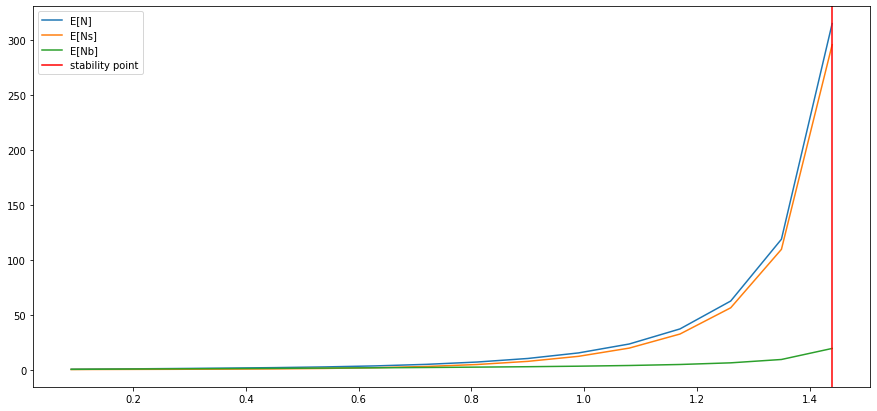

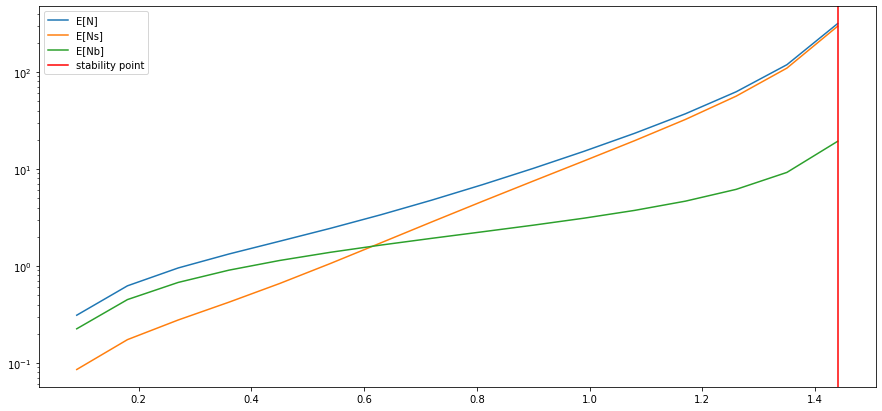

0.72


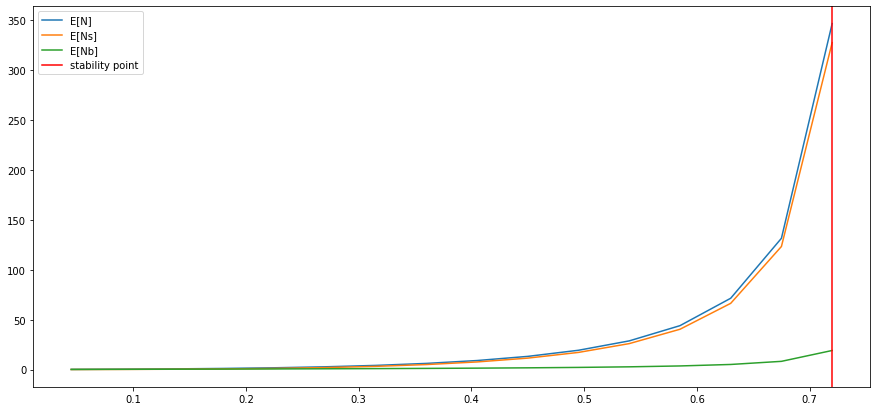

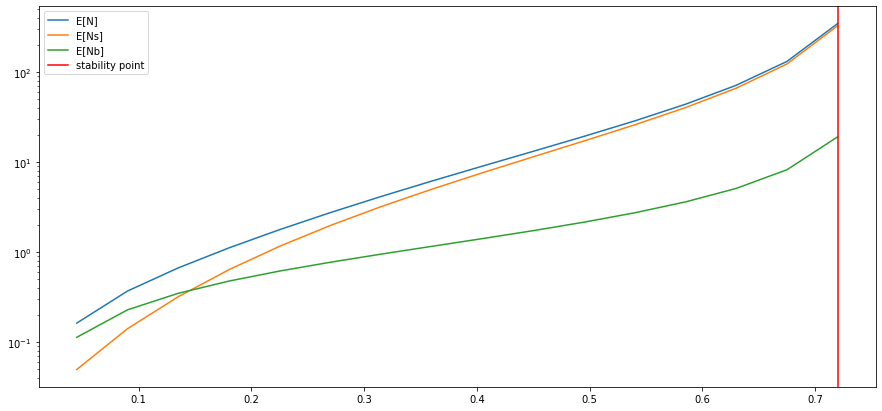

0.36


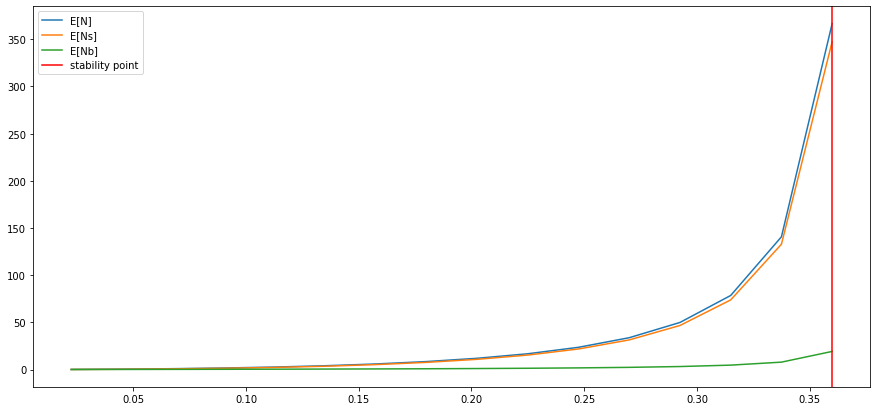

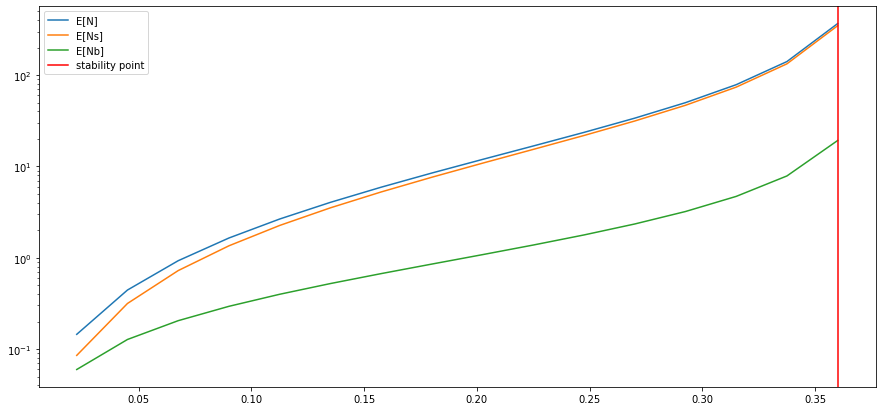

In [30]:
for N in [256]:    
    i = 0
    for T in [N//4,N//2,N]:
        for pb in [0.05]:
            ps = 1-pb
            for mu_b in [0.02]:
                
                start_sim = time.time()

                plot_lim = 16
                data = measurements[i]

                #arr_rate_limit = 1.6
                #arr_rate_range = np.arange(0,arr_rate_limit*1.01,(arr_rate_limit)/20)[1:]

                plt.figure(figsize=(15,7))
                plt.plot([r[-3] for r in data[:plot_lim]] , [r[0] for r in data[:plot_lim]], label = "E[N]")
                plt.plot([r[-3] for r in data[:plot_lim]], [r[1] for r in data[:plot_lim]], label = "E[Ns]")
                plt.plot([r[-3] for r in data[:plot_lim]], [r[2] for r in data[:plot_lim]], label = "E[Nb]")
                
                stable_limit = 0
                j = 1
                for r in [d[-3] for d in data][1:]:
                    scl = r*ps
                    scr = data[j][7]*mu_s
                    if scl < scr:
                        pass
                    else:
                        stable_limit = r
                        print(stable_limit)
                        break
                    j += 1
                
                plt.axvline(x = stable_limit, color = 'r', linewidth = 1.5, label = "stability point")
                #plt.yscale("log")
                plt.legend()
                #plt.savefig(''+str(N)+' '+str(T)+' '+str(pb)+' '+str(mu_b)+' N.png', bbox_inches='tight')
                plt.show()
                
                plt.figure(figsize=(15,7))
                plt.plot([r[-3] for r in data[:plot_lim]] , [r[0] for r in data[:plot_lim]], label = "E[N]")
                plt.plot([r[-3] for r in data[:plot_lim]], [r[1] for r in data[:plot_lim]], label = "E[Ns]")
                plt.plot([r[-3] for r in data[:plot_lim]], [r[2] for r in data[:plot_lim]], label = "E[Nb]")
                
                plt.axvline(x = stable_limit, color = 'r', linewidth = 1.5, label = "stability point")
                plt.yscale("log")
                plt.legend()
                #plt.savefig(''+str(N)+' '+str(T)+' '+str(pb)+' '+str(mu_b)+' N.png', bbox_inches='tight')
                plt.show()
                
                i += 1

In [ ]:
## NEW

N = 300
T = 30
arr_rate = 0.05
pb = 0.2
ps = 1-pb
lambda_s = (arr_rate*ps)
lambda_b = (arr_rate*pb)
mu_s = 1
mu_b = 1

start_sim = time.time()

d1 = round(N + ((N*N)/(2*T)) - (N/2) + (N/T) + 1)
d2 = round((T)*(N/T) + 1)
#print(d1)
#print(d2)

q_dim = d1+(d2*(T+2))
q = csr_matrix((q_dim,q_dim))
#q = csc_matrix(q)
#print(q)

def access_q(n1,s1,b1,n2,s2,b2):
    row = access_map[(s1,b1)]
    col = access_map[(s2,b2)]
    if (n1>0):
        row = d1 + ((n1-1)*d2) + access_map_v2[(s1,b1)]
    if (n2>0):
        col = d1 + ((n2-1)*d2) + access_map_v2[(s2,b2)]
    return((row,col))


access_map = dict()
i = 0
for s in range(N+1):
    for b in range(round(N/T)+1):
        if (s+(b*T)) <= N:
            access_map[(s,b)] = i
            i = i+1

access_map_v2 = dict()
i = 0
for s in range(N+1):
    for b in range(round(N/T)+1):
        if (s+(b*T)) > (N-T) and (s+(b*T)) <= N:
            access_map_v2[(s,b)] = i
            i = i+1

def init_transitions_arr(dim):
    global q
    for n in range(dim):
        for s in range(N+1):
            for b in range (N+1):
                    
                if n > 0 and (s,b) in access_map_v2:
                    r,c = access_q(n,s,b, n+1,s,b)
                    q[r,c] = arr_rate
                elif n == 0:
                    if (s+(b*T)) == N:
                        r,c = access_q(0,s,b, 1,s,b)
                        q[r,c] = arr_rate
                    elif (s+(b*T)) <= (N-T):
                        r,c = access_q(0,s,b, 0,s+1,b)
                        q[r,c] = lambda_s
                        r,c = access_q(0,s,b, 0,s,b+1)
                        q[r,c] = lambda_b
                    elif (s+(b*T)) > (N-T) and (s+(b*T)) < N:
                        r,c = access_q(0,s,b, 0,s+1,b)
                        q[r,c] = lambda_s
                        r,c = access_q(0,s,b, 1,s,b)
                        q[r,c] = lambda_b

def init_transitions_srv(dim):
    global q
    for n in range(dim):
        for s in range(N+1):
            for b in range (N+1):
                F = N - (b*T) - s

                if n > 0 and (s+(b*T)) == N:
                    K = min(n,T)
                    if s > 0:
                        r,c = access_q(n,s,b, n-1,s,b)
                        q[r,c] = q[r,c] + (s*mu_s*ps)

                        r,c = access_q(n,s,b, n,s-1,b)
                        q[r,c] = q[r,c] + (s*mu_s*pb)
                    if b > 0:
                        r,c = access_q(n,s,b, n-1,s,b)
                        q[r,c] = q[r,c] + (b*mu_b*pb)

                        for i in range(1,K):
                            r,c = access_q(n,s,b, n-i,s+i,b-1)
                            q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                        r,c = access_q(n,s,b, n-K,s+K,b-1)
                        q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))


                elif n > 0 and F > 0 and F < (T-1):
                    K = min(F,n-1)
                    if s > 0:
                        r,c = access_q(n,s,b, n,s-1,b)
                        q[r,c] = q[r,c] + (s*mu_s)
                    if b > 0:
                        for i in range(0,K):
                            r,c = access_q(n,s,b, n-i-1,s+i,b)
                            q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                        r,c = access_q(n,s,b, n-K-1,s+K,b)
                        q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))

                elif n > 0 and F == (T-1):
                    K = min(F,n-1)
                    if s > 0:
                        r,c = access_q(n,s,b, n-1,s-1,b+1)
                        q[r,c] = q[r,c] + (s*mu_s)
                    if b > 0:
                        for i in range(0,K):
                            r,c = access_q(n,s,b, n-i-1,s+i,b)
                            q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                        r,c = access_q(n,s,b, n-K-1,s+K,b)
                        q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))

                elif n == 0 and (s+(b*T)) <= N:
                    if s > 0:
                        r,c = access_q(0,s,b, 0,s-1,b)
                        q[r,c] = q[r,c] + (s*mu_s)
                    if b > 0:
                        r,c = access_q(0,s,b, 0,s,b-1)
                        q[r,c] = q[r,c] + (b*mu_b)

def fill_diagonal():
    for i in range(q.shape[0]):
        q[i,i] = -(np.sum(q[i])-q[i,i])
    

init_transitions_arr(T+2)
init_transitions_srv(T+2)
fill_diagonal()

#q = csr_matrix(q).toarray()

diag = d1 + (d2*T)

Bs = []
for i in range(1,T+1):
    block = q[diag:diag+d2, diag-(d2*i):diag-(d2*i)+d2].toarray()
    Bs.append(block)

L = q[diag:diag+d2, diag:diag+d2].toarray()
F = q[diag:diag+d2, diag+d2:diag+d2+d2].toarray()
L_prime = q[0:d1,0:d1].toarray()
F_prime = q[0:d1,d1:d1+d2].toarray()
Bs_prime = [q[d1:d1+d2,0:d1].toarray()]
for i in range(T-1):
    Bs_prime.append(q[d1+((i+1)*d2) : d1+((i+1)*d2)+d2 , 0:d1].toarray())
    
print("Generating time --- %s seconds ---" % (time.time() - start_sim))

L_inv = np.linalg.inv(L)
V = np.matmul(F,L_inv)
Ws = []
for B in Bs:
    W = np.matmul(B,L_inv)
    Ws.append(W)
Ws

Rs = [np.zeros((d2,d2))]
diff = 1
i = 0
while diff > 1e-12:    
    R = -V
    j = 2
    for W in Ws:
        R = np.subtract(R,np.matmul(np.linalg.matrix_power(Rs[i],j),W))
        j += 1
    diff = R[0][0] - Rs[-1][0][0]
    Rs.append(R)
    i += 1
R = Rs[-1]
print(len(Rs))

#
tl = L_prime
tr = F_prime
bl = Bs_prime[0]
for i in range(1,len(Bs_prime)):
    b = Bs_prime[i]
    bl = np.add(bl,np.matmul(np.linalg.matrix_power(R,i),b))
br = L
#i = 1
for i in range(len(Bs)):
    b = Bs[i]
    br = np.add(br,np.matmul(np.linalg.matrix_power(R,i+1),b))
'''for b in Bs:
    br = np.add(br,np.matmul(np.linalg.matrix_power(R,i),b))
    i += 1'''


#
bc = np.append(tl,tr,axis=1)
bcb = np.append(bl,br,axis=1)
bc = np.append(bc,bcb,axis=0)
bc[0][-1] = 1
for r in bc[1:]:
    r[-1] = 0

#
a = np.transpose(bc)
b = np.zeros(d1+d2)
b[-1] = 1
raw_pi = np.linalg.solve(a,b)

#
ir = np.linalg.inv(np.subtract(np.identity(R.shape[0]),R))
r = np.matmul(raw_pi[d1:],ir)
alfa = np.sum(raw_pi[:d1]) + np.sum(r)
pi = raw_pi/alfa
pis = [pi[:d1],pi[d1:]]
for i in range(2,max(N,100)):
    pis.append(np.matmul(pis[i-1],R))
    
print("Total time --- %s seconds ---" % (time.time() - start_sim))



In [ ]:
pis

In [ ]:
mu_s = 1
mu_b = 0.1
for N in [500]:    
    for T in [N/10,N/2,N]:
        T = round(T)

        #N = 100
        #T = round(N/10)
        #pb = 0.2
        #ps = 1-pb
        #mu_b = 0.01

        start_sim = time.time()

        results = []
        stable = True
        stable_limit = 0

        pb_range = np.arange(0,1,0.04)[1:]

        for pb in pb_range:
            ps = 1-pb
            arr_rate = 0.3/(ps+(pb/mu_b))
            lambda_s = (arr_rate*ps)
            lambda_b = (arr_rate*pb)


            d1 = round(N + ((N*N)/(2*T)) - (N/2) + (N/T) + 1)
            d2 = round((T)*(N/T) + 1)
            #print(d1)
            #print(d2)

            q_dim = d1+(d2*(T+2))
            #q = np.zeros((q_dim,q_dim))
            q = lil_matrix((q_dim,q_dim))
            #print(q)

            def access_q(n1,s1,b1,n2,s2,b2):
                global q
                '''if n1 == 0:
                    pass
                elif n2 == 0:
                    pass
                elif n1 == T+1:
                    pass
                else:
                    return ((0,0))'''

                q_dim = ((q.shape[0]-d1)/d2)
                '''if n1 > q_dim:
                    #extra = int((n1 - (int(q.shape[0]/d1)-1))*d1)
                    extra = d2

                    cc = q.shape[1]
                    q = np.append(q,np.zeros((extra,cc)), axis=0)
                    cr = q.shape[0]
                    q = np.append(q,np.zeros((cr,extra)), axis=1)
                elif n2 > q_dim:
                    #extra = int((n2 - (int(q.shape[0]/d1)-1))*d1)
                    extra = d2
                    #print(extra)

                    cc = q.shape[1]
                    q = np.append(q,np.zeros((extra,cc)), axis=0)
                    cr = q.shape[0]
                    q = np.append(q,np.zeros((cr,extra)), axis=1)'''


                row = access_map[(s1,b1)]
                col = access_map[(s2,b2)]
                if (n1>0):
                    row = d1 + ((n1-1)*d2) + access_map_v2[(s1,b1)]
                if (n2>0):
                    col = d1 + ((n2-1)*d2) + access_map_v2[(s2,b2)]
                return((row,col))




            access_map = dict()
            i = 0
            for s in range(N+1):
                for b in range(round(N/T)+1):
                    if (s+(b*T)) <= N:
                        access_map[(s,b)] = i
                        i = i+1

            access_map_v2 = dict()
            i = 0
            for s in range(N+1):
                for b in range(round(N/T)+1):
                    if (s+(b*T)) > (N-T) and (s+(b*T)) <= N:
                        access_map_v2[(s,b)] = i
                        i = i+1

            def init_transitions_arr(dim):
                global q
                for n in range(dim):
                    for s in range(N+1):
                        for b in range (N+1):
                            if n > 0 and (s,b) in access_map_v2:
                                r,c = access_q(n,s,b, n+1,s,b)
                                q[r,c] = arr_rate
                            elif n == 0:
                                if (s+(b*T)) == N:
                                    r,c = access_q(0,s,b, 1,s,b)
                                    q[r,c] = arr_rate
                                elif (s+(b*T)) <= (N-T):
                                    r,c = access_q(0,s,b, 0,s+1,b)
                                    q[r,c] = lambda_s
                                    r,c = access_q(0,s,b, 0,s,b+1)
                                    q[r,c] = lambda_b
                                elif (s+(b*T)) > (N-T) and (s+(b*T)) < N:
                                    r,c = access_q(0,s,b, 0,s+1,b)
                                    q[r,c] = lambda_s
                                    r,c = access_q(0,s,b, 1,s,b)
                                    q[r,c] = lambda_b

            def init_transitions_srv(dim):
                global q
                for n in range(dim):
                    for s in range(N+1):
                        for b in range (N+1):
                            F = N - (b*T) - s

                            if n > 0 and (s+(b*T)) == N:
                                K = min(n,T)
                                if s > 0:
                                    r,c = access_q(n,s,b, n-1,s,b)
                                    q[r,c] = q[r,c] + (s*mu_s*ps)

                                    r,c = access_q(n,s,b, n,s-1,b)
                                    q[r,c] = q[r,c] + (s*mu_s*pb)
                                if b > 0:
                                    r,c = access_q(n,s,b, n-1,s,b)
                                    q[r,c] = q[r,c] + (b*mu_b*pb)

                                    for i in range(1,K):
                                        r,c = access_q(n,s,b, n-i,s+i,b-1)
                                        q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                                    r,c = access_q(n,s,b, n-K,s+K,b-1)
                                    q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))


                            elif n > 0 and F > 0 and F < (T-1):
                                K = min(F,n-1)
                                if s > 0:
                                    r,c = access_q(n,s,b, n,s-1,b)
                                    q[r,c] = q[r,c] + (s*mu_s)
                                if b > 0:
                                    for i in range(0,K):
                                        r,c = access_q(n,s,b, n-i-1,s+i,b)
                                        q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                                    r,c = access_q(n,s,b, n-K-1,s+K,b)
                                    q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))

                            elif n > 0 and F == (T-1):
                                K = min(F,n-1)
                                if s > 0:
                                    r,c = access_q(n,s,b, n-1,s-1,b+1)
                                    q[r,c] = q[r,c] + (s*mu_s)
                                if b > 0:
                                    for i in range(0,K):
                                        r,c = access_q(n,s,b, n-i-1,s+i,b)
                                        q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,i)*pb)

                                    r,c = access_q(n,s,b, n-K-1,s+K,b)
                                    q[r,c] = q[r,c] + (b*mu_b*math.pow(ps,K))

                            elif n == 0 and (s+(b*T)) <= N:
                                if s > 0:
                                    r,c = access_q(0,s,b, 0,s-1,b)
                                    q[r,c] = q[r,c] + (s*mu_s)
                                if b > 0:
                                    r,c = access_q(0,s,b, 0,s,b-1)
                                    q[r,c] = q[r,c] + (b*mu_b)

            def fill_diagonal():
                for i in range(q.shape[0]):
                    q[i,i] = -(np.sum(q[i])-q[i,i])

            init_transitions_arr(T+2)
            init_transitions_srv(T+2)
            fill_diagonal()

            diag = d1 + (d2*T)

            Bs = []
            for i in range(1,T+1):
                block = q[diag:diag+d2, diag-(d2*i):diag-(d2*i)+d2].toarray()
                Bs.append(block)

            L = q[diag:diag+d2, diag:diag+d2].toarray()
            F = q[diag:diag+d2, diag+d2:diag+d2+d2].toarray()
            L_prime = q[0:d1,0:d1].toarray()
            F_prime = q[0:d1,d1:d1+d2].toarray()
            Bs_prime = [q[d1:d1+d2,0:d1].toarray()]
            for i in range(T-1):
                Bs_prime.append(q[d1+((i+1)*d2) : d1+((i+1)*d2)+d2 , 0:d1].toarray())

            L_inv = np.linalg.inv(L)
            V = np.matmul(F,L_inv)
            Ws = []
            for B in Bs:
                W = np.matmul(B,L_inv)
                Ws.append(W)
            Ws

            Rs = [np.zeros((d2,d2))]
            diff = 1
            i = 0
            while diff > 1e-12:    
                R = -V
                j = 2
                for W in Ws:
                    R = np.subtract(R,np.matmul(np.linalg.matrix_power(Rs[i],j),W))
                    j += 1
                diff = R[0][0] - Rs[-1][0][0]
                Rs.append(R)
                i += 1
            R = Rs[-1]

            #
            tl = L_prime
            tr = F_prime
            bl = Bs_prime[0]
            for i in range(1,len(Bs_prime)):
                b = Bs_prime[i]
                bl = np.add(bl,np.matmul(np.linalg.matrix_power(R,i),b))
            br = L
            #i = 1
            for i in range(len(Bs)):
                b = Bs[i]
                br = np.add(br,np.matmul(np.linalg.matrix_power(R,i+1),b))
            '''for b in Bs:
                br = np.add(br,np.matmul(np.linalg.matrix_power(R,i),b))
                i += 1'''


            #
            bc = np.append(tl,tr,axis=1)
            bcb = np.append(bl,br,axis=1)
            bc = np.append(bc,bcb,axis=0)
            bc[0][-1] = 1
            for r in bc[1:]:
                r[-1] = 0

            #
            a = np.transpose(bc)
            b = np.zeros(d1+d2)
            b[-1] = 1
            pi = np.linalg.solve(a,b)

            #
            ir = np.linalg.inv(np.subtract(np.identity(R.shape[0]),R))
            r = np.matmul(pi[d1:],ir)
            alfa = np.sum(pi[:d1]) + np.sum(r)
            pi = pi/alfa
            pis = [pi[:d1],pi[d1:]]
            for i in range(2,101):
                pis.append(np.matmul(pis[i-1],R))

            if stable == True and check_stability() == False:
                stable = False
                stable_limit = arr_rate

            mLz = np.array([
                [s[0] for s in access_map],
                [s[1] for s in access_map]
            ])
            mL_t = []
            mL_b = []
            for s in access_map_v2:
                if s[0] + (s[1]*T) < N:
                    mL_t.append(s[0])
                    mL_b.append(s[1]+1) #HOL
                elif s[0] + (s[1]*T) == N:
                    mL_t.append(s[0] + ps)
                    mL_b.append(s[1] + pb)
            mL = np.array([
                mL_t,
                mL_b
            ])

            Nl = np.matmul(mLz,pis[0])

            Nrl = np.matmul(np.transpose(pis[1]),np.matmul(R,np.linalg.matrix_power(np.subtract(np.identity(R.shape[0]),R),-2)))
            Nrl = np.sum(Nrl)
            Nrl = np.array([ps,pb])*Nrl

            Nrr = np.matmul(np.transpose(pis[1]),ir)

            Nrr = np.matmul(mL,np.transpose(Nrr))

            Nr = np.add(Nrl,Nrr)
            N_ao = np.add(Nl,Nr)

            Nwb = 0
            Nws = 0
            Nsb = 0
            Nss = 0
            n = 1
            for sp in pis[1:]:
                i = 0
                for s in access_map_v2:
                    if s[0] + (s[1]*T) < N:
                        Nwb += sp[i]*(1+((n-1)*pb))
                        Nws += sp[i]*((n-1)*ps)
                    elif s[0] + (s[1]*T) == N:
                        Nwb += sp[i]*n*pb
                        Nws += sp[i]*n*ps

                    Nsb += sp[i]*s[1]
                    Nss += sp[i]*s[0]

                    i += 1
                n += 1

            Nw = np.array([Nws, Nwb])

            #Ns for n = 0
            i = 0
            for s in access_map:
                Nsb += pis[0][i]*s[1]
                Nss += pis[0][i]*s[0]
                i += 1

            #N, total
            Nb = Nwb+Nsb
            Ns = Nws+Nss

            #T
            RT = np.sum(N_ao)/arr_rate
            RTs = N_ao[0]/lambda_s
            RTb = N_ao[1]/lambda_b

            results.append([
                np.sum(N_ao),
                N_ao[0],
                N_ao[1],
                np.sum(Nw),
                Nw[0],
                Nw[1],
                RT,
                RTs,
                RTb
            ])
            #print("Run time --- %s seconds ---" % (time.time() - start_sim))

        if stable == True:
            stable_limit = arr_rate

        print("Total time --- %s seconds ---" % (time.time() - start_sim))
        print('N: '+str(N)+', T: '+str(T))

        plt.figure(figsize=(15,7))
        plt.plot(pb_range, [r[0] for r in results], label = "E[N]")
        plt.plot(pb_range, [r[1] for r in results], label = "E[Ns]")
        plt.plot(pb_range, [r[2] for r in results], label = "E[Nb]")
        plt.legend()
        plt.savefig(''+str(N)+' '+str(T)+' N.png', bbox_inches='tight')
        plt.show()

        plt.figure(figsize=(15,7))
        plt.plot(pb_range, [r[3] for r in results], label = "E[W]")
        plt.plot(pb_range, [r[4] for r in results], label = "E[Ws]")
        plt.plot(pb_range, [r[5] for r in results], label = "E[Wb]")
        plt.legend()
        plt.savefig(''+str(N)+' '+str(T)+' W.png', bbox_inches='tight')
        plt.show()

        plt.figure(figsize=(15,7))
        plt.plot(pb_range, [r[6] for r in results], label = "E[T]")
        plt.plot(pb_range, [r[7] for r in results], label = "E[Ts]")
        plt.plot(pb_range, [r[8] for r in results], label = "E[Tb]")
        #plt.axvline(x = stable_limit, color = 'r', label = "stability point")
        plt.legend()
        plt.savefig(''+str(N)+' '+str(T)+' T.png', bbox_inches='tight')
        plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(pb_range, [r[0] for r in results], label = "E[N]")
plt.plot(pb_range, [r[1] for r in results], label = "E[Ns]")
plt.plot(pb_range, [r[2] for r in results], label = "E[Nb]")
plt.legend()
plt.savefig(''+str(N)+' '+str(T)+' N.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(15,7))
plt.plot(pb_range, [r[3] for r in results], label = "E[W]")
plt.plot(pb_range, [r[4] for r in results], label = "E[Ws]")
plt.plot(pb_range, [r[5] for r in results], label = "E[Wb]")
plt.legend()
plt.savefig(''+str(N)+' '+str(T)+' W.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(15,7))
plt.plot(pb_range, [r[6] for r in results], label = "E[T]")
plt.plot(pb_range, [r[7] for r in results], label = "E[Ts]")
plt.plot(pb_range, [r[8] for r in results], label = "E[Tb]")
#plt.axvline(x = stable_limit, color = 'r', label = "stability point")
plt.legend()
plt.savefig(''+str(N)+' '+str(T)+' T.png', bbox_inches='tight')
plt.show()

In [ ]:
arr_rate_limit+(arr_rate_limit*1.01)

In [ ]:

check_stability()

In [ ]:
mLz = np.array([
    [s[0] for s in access_map],
    [s[1] for s in access_map]
])
mL_t = []
mL_b = []
for s in access_map_v2:
    if s[0] + (s[1]*T) < N:
        mL_t.append(s[0])
        mL_b.append(s[1]+1) #HOL
    elif s[0] + (s[1]*T) == N:
        mL_t.append(s[0] + ps)
        mL_b.append(s[1] + pb)
mL = np.array([
    mL_t,
    mL_b
])
mLz

In [ ]:
N_ao.shape

In [ ]:
Nl = np.matmul(mLz,pis[0])
Nl

In [ ]:
Nrl = np.matmul(np.transpose(pis[1]),np.matmul(R,np.linalg.matrix_power(np.subtract(np.identity(R.shape[0]),R),-2)))
print(Nrl)
Nrl = np.sum(Nrl)
print(Nrl)
Nrl = np.array([ps,pb])*Nrl
Nrl

In [ ]:
Nrr = np.matmul(np.transpose(pis[1]),ir)

Nrr = np.matmul(mL,np.transpose(Nrr))
Nrr

In [ ]:
Nr = np.add(Nrl,Nrr)
N_ao = np.add(Nl,Nr)
N_ao

In [ ]:
pis

In [ ]:
#Nw -> n>0
Nwb = 0
Nws = 0
Nsb = 0
Nss = 0
n = 1
for sp in pis[1:]:
    i = 0
    for s in access_map_v2:
        if s[0] + (s[1]*T) < N:
            Nwb += sp[i]*(1+((n-1)*pb))
            Nws += sp[i]*((n-1)*ps)
        elif s[0] + (s[1]*T) == N:
            Nwb += sp[i]*n*pb
            Nws += sp[i]*n*ps
        
        Nsb += sp[i]*s[1]
        Nss += sp[i]*s[0]
        
        i += 1
    n += 1
    
Nw = np.array([Nws, Nwb])

#Ns for n = 0
i = 0
for s in access_map:
    Nsb += pis[0][i]*s[1]
    Nss += pis[0][i]*s[0]
    i += 1
    
#N, total
Nb = Nwb+Nsb
Ns = Nws+Nss
np.array([Ns, Nb])


In [ ]:
print(np.array([Nss, Nsb]))
print(np.array([Nws, Nwb]))

In [ ]:
d1 = int(N + ((N*N)/(2*T)) - (N/2) + (N/T) + 1)
d2 = int((T)*(N/T) + 1)
#print(d1)
#print(d2)

q = np.zeros((d1,d1))
#print(q)

def access_q(n1,s1,b1,n2,s2,b2):
    global q
    q_dim = ((q.shape[0]-d1)/d2)
    if n1 > q_dim:
        #extra = int((n1 - (int(q.shape[0]/d1)-1))*d1)
        extra = d2
        
        cc = q.shape[1]
        q = np.append(q,np.zeros((extra,cc)), axis=0)
        cr = q.shape[0]
        q = np.append(q,np.zeros((cr,extra)), axis=1)
    elif n2 > q_dim:
        #extra = int((n2 - (int(q.shape[0]/d1)-1))*d1)
        extra = d2
        #print(extra)
        
        cc = q.shape[1]
        q = np.append(q,np.zeros((extra,cc)), axis=0)
        cr = q.shape[0]
        q = np.append(q,np.zeros((cr,extra)), axis=1)
    
    
    row = access_map[(s1,b1)]
    col = access_map[(s2,b2)]
    if (n1>0):
        row = d1 + ((n1-1)*d2) + access_map_v2[(s1,b1)]
    if (n2>0):
        col = d1 + ((n2-1)*d2) + access_map_v2[(s2,b2)]
    return((row,col))

start_sim = time.time()
    

access_map = dict()
i = 0
for s in range(N+1):
    for b in range(int(N/T)+1):
        if (s+(b*T)) <= N:
            access_map[(s,b)] = i
            i = i+1
            
access_map_v2 = dict()
i = 0
for s in range(N+1):
    for b in range(int(N/T)+1):
        if (s+(b*T)) > (N-T) and (s+(b*T)) <= N:
            access_map_v2[(s,b)] = i
            i = i+1
            
init_transitions_arr(100)
init_transitions_srv(100)
#fill_diagonal()
q = q[:-d2,:-d2]
fill_diagonal()

a = np.transpose(q)
a[-1] = np.ones(q.shape[0])
b = np.zeros(q.shape[0])
b[-1] = 1
trunc_pis = np.linalg.solve(a,b)


print("Total time --- %s seconds ---" % (time.time() - start_sim))

In [ ]:
res = [['State','Truncation','matrix geom.']]
i = 0
for st in access_map:
    #res.append([(0,st[0],st[1]),ctmc,trunc_pis[i], conf,diff, check])
    res.append([[0,st[0],st[1]],trunc_pis[i],pis[0][i]])
    i += 1

for j in range(1,len(pis)):
    i = 0
    for st in access_map_v2:
        res.append([[j,st[0],st[1]],trunc_pis[d1+((j-1)*d2)+i],pis[j][i]])
        i += 1

print(tabulate(res, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
q = np.array([
    [-6,5,1,0,0,0,0,0,0,0,0,0,0,0],
    [3,-3.5,0,0,0.5,0,0,0,0,0,0,0,0,0],
    [0,0,-6,5,0,1,0,0,0,0,0,0,0,0],
    [2,2,3,-12,5,0,0,0,0,0,0,0,0,0],
    [0,0,0,3,-3.5,0,0,0.5,0,0,0,0,0,0],
    [0.25,0,0,0,0,-6.25,5,0,1,0,0,0,0,0],
    [0,0,0,4,0,3,-12,5,0,0,0,0,0,0],
    [0,0.75,0,0,0,0,3,-4.25,0,0,0.5,0,0,0],
    [0,0,0,0.25,0,0,0,0,-6.25,5,0,1,0,0],
    [0,0,0,0,0,0,4,0,3,-12,5,0,0,0],
    [0,0,0,0,0.75,0,0,0,0,3,-4.25,0,0,0.5]
])

d1 = 2
d2 = 3
T = 2

diag = d1 + (d2*T)

Bs = []
for i in range(1,T+1):
    block = q[diag:diag+d2, diag-(d2*i):diag-(d2*i)+d2]
    Bs.append(block)
    
L = q[diag:diag+d2, diag:diag+d2]
F = q[diag:diag+d2, diag+d2:diag+d2+d2]
L_prime = q[0:d1,0:d1]
F_prime = q[0:d1,d1:d1+d2]
Bs_prime = [q[d1:d1+d2,0:d1]]
for i in range(T-1):
    Bs_prime.append(q[d1+((i+1)*d2) : d1+((i+1)*d2)+d2 , 0:d1])

L

In [ ]:
np.savetxt("q.csv", q, delimiter = ",")

In [ ]:
access_map

In [ ]:
access_map_v2

In [ ]:
import numpy as np
import queue
from statistics import mean
import matplotlib.pyplot as plt
import math
import random
import time
import statistics
import scipy.stats as sct
from tabulate import tabulate

In [ ]:
def avl_server(t,servers):
    low = len(servers)
    i = 0
    for s in servers:
        if t > s[1]:
            if low == len(servers):
                low = i
            elif s[1] < servers[low][1]:
                low = i
        i += 1
    if low < len(servers):
        return low #return server with earliest idle time
    return len(servers)

def get_avl_servers(t,servers,n):
    empty = []
    i = 0
    for s in servers:
        if t >= s[1]: #get empty servers
            empty.append((i,s[1]))
        i += 1
    empty.sort(key = lambda x: x[1])
    return empty[:n] #return the [server index,free time]

def busy_server_n(t,servers):
    n = 0
    i = 0
    jobs = dict()
    jobs['big'] = []
    jobs['small'] = []
    jobs[''] = []
    for s in servers:
        if s[1] == 0:
            continue
        if t < s[1] and t >= s[0]: #get busy server
            n += 1
            #print(jobs)
            #print(s)
            #print(s[2])
            job_type = s[2].split('_')[0]
            #print(jobs[job_type])
            jobs[job_type].append(s[2])
            #print(jobs)
            #print('-----------')
        i+=1
    big_job_n = len(list(set(jobs['big'])))
    small_job_n = len(list(set(jobs['small'])))
    return (n,small_job_n,big_job_n) #reverse

def queue_counter(q,big_job_size):
    small_jobs = 0
    big_jobs = 0
    for job in q:
        if job[1] == big_job_size:
            big_jobs += 1
        else:
            small_jobs += 1
    return ((small_jobs,big_jobs))

def get_job_size():
    size = random.randint(1,5)
    if size < 5:
        return 1
    return T

def get_srv_rate(job_size):
    if job_size == 1:
        return mu_s
    elif job_size == T:
        return mu_b

measurements = []
for run in range(20):
    start_sim = time.time()
    max_job_size = T
    server_start = 0

    duration = 3600*100
    #job_size = 10

    server_n = N
    #srv_rate = 5

    # POPULATE THE JOBS ARRIVAL TIMES AND JOB SIZE
    t = 0
    jobs_arr_t = []
    while t <= duration:
        iat = np.random.exponential(1/arr_rate)
        t += iat
        #jobs_arr_t.append((t,random.choice([1,job_size])))
        jobs_arr_t.append((t,get_job_size()))

    waiting_times = []
    response_times = []
    queue = []

    # INITIATE THE N SERVERS
    servers = [] #[service_start,end]
    for s in range(server_n):
        servers.append([0,server_start,''])

    server_load = [[0,0]]
    queue_size = [[0,0]]
    jobs_inside = [[0,0,0]]
    jobs_queue = [[0,0,0]]
    throughput_small = 0
    throughput_big = 0
    nsb = [(0,0,0,0)]

    job_id = 0
    # ITERATE EVENT-BASED (CAN BE JOBS ARRIVAL OR SERVICE FINISHED)
    while job_id < len(jobs_arr_t):
        t = 999999999
        curr_job = jobs_arr_t[job_id] 
        # ITERATE ALL THE SERVERS AND GET THE NEXT EARLIEST SERVER FINISH
        for s in servers:
            if s[1] > 0 and s[1] < t and s[1] > server_load[-1][0]:
                t = s[1]
        # GET THE NEXT JOBS ARRIVAL
        if jobs_arr_t[job_id][0] < t:
            t = jobs_arr_t[job_id][0]
            queue.append(curr_job)
            job_id += 1
        # NOW, t IS THE NEXT EVENT HAPPENING
        #print(t)

        # HOL TECHNIQUE WHERE SCHEDULERS PRIORITIZE THE JOBS AT THE FRONT,
        # AND WAIT UNTIL HOWEVER MANY SERVERS THAT JOB NEEDS ARE AVAILABLE
        while len(queue) > 0:
            job = queue[0] #only the job at the front
            avl_servers_n = len(servers)-busy_server_n(t,servers)[0] #get the number of available servers
            if avl_servers_n >= job[1]: #if it's enough for the job at the front
                ready_servers = get_avl_servers(t,servers,job[1]) #get all the servers ready to service
                st = np.random.exponential(1/get_srv_rate(job[1])) #determine the service rate
                for s in ready_servers:# put the job in each ready server
                    server_id = s[0]
                    job_name = ''
                    if job[1] == max_job_size: #for graph purpose
                        job_name += 'big'
                    else:
                        job_name += 'small'
                    job_name += '_'+str(job[0])
                    servers[server_id] = [t,t+st,job_name]
                waiting_times.append((t-job[0],job[1])) #for graph purpose
                response_times.append((t+st-job[0],job[1])) #for graph purpose
                queue.pop(0)
                if job[1] == max_job_size: #for graph purpose
                    throughput_big += 1
                else:
                    throughput_small += 1
            else:
                break

        server_state = busy_server_n(t,servers)
        queue_state = queue_counter(queue,max_job_size)
        server_load.append((t,server_state[0])) #for graph purpose
        queue_size.append((t,len(queue))) #for graph purpose
        jobs_inside.append((t,server_state[1],server_state[2]))
        jobs_queue.append((t,queue_state[0],queue_state[1]))
        nsb.append((t,len(queue),server_state[1],server_state[2]))

    print('Arrival rate: '+str(arr_rate))
    
    avg_wait = []
    n = 1
    tot = 0
    for w in [wt[0] for wt in waiting_times]:
        tot += w
        avg_wait.append(tot/n)
        n += 1

    avg_resp = []
    avg_resp_s = 0
    avg_resp_b = 0
    n = 1
    tot = 0
    for w in [rt[0] for rt in response_times]:
        tot += w
        avg_resp.append(tot/n)
        n += 1
        
    for rt in response_times:
        if rt[1] == 1:
            avg_resp_s += rt[0]
        else:
            avg_resp_b += rt[0]
    avg_resp_s = avg_resp_s/throughput_small
    avg_resp_b = avg_resp_b/throughput_big

    plt.figure(figsize=(15,10))
    plt.plot([i for i in range(len(avg_wait))], avg_wait, label = "Wait Times")
    plt.plot([i for i in range(len(avg_resp))], avg_resp, label = "Response Times")
    plt.legend()
    plt.show()

    # counting the utilization
    util = 0 
    n_small = 0
    n_big = 0
    n_small_w = 0
    n_big_w = 0
    i = 1
    while i < len(server_load):
        if server_load[i-1][0] < server_start:
            i += 1
            continue
        timestamp = server_load[i][0] - server_load[i-1][0]
        load = server_load[i-1][1]
        small_load = jobs_inside[i-1][1]
        big_load = jobs_inside[i-1][2]
        small_queue = jobs_queue[i-1][1]
        big_queue = jobs_queue[i-1][2]
        util += (timestamp*load)
        n_small += (timestamp*small_load)
        n_big += (timestamp*big_load)
        n_small_w += (timestamp*small_queue)
        n_big_w += (timestamp*big_queue)
        i += 1
    duration -= server_start
    avg_util = util/duration/server_n
    avg_n_small = n_small/duration
    avg_n_big = n_big/duration
    avg_n_small_w = n_small_w/duration
    avg_n_big_w = n_big_w/duration
    avg_thr_small = throughput_small/duration
    avg_thr_big = throughput_big/duration
    measurements.append([nsb,avg_n_small,avg_n_big,avg_n_small_w,avg_n_big_w,avg_resp[-1],avg_resp_s,avg_resp_b])

    print('Utilization: '+str(avg_util))
    print('Small job throughput: '+str(avg_thr_small))
    print('Big job throughput: '+str(avg_thr_big))
    print('Average number of small job in srv: '+str(avg_n_small))
    print('Average number of big job in srv: '+str(avg_n_big))
    print('Average number of small job in waiting: '+str(avg_n_small_w))
    print('Average number of big job in waiting: '+str(avg_n_big_w))
    print('Average number of small job total: '+str(avg_n_small+avg_n_small_w))
    print('Average number of big job total: '+str(avg_n_big+avg_n_big_w))

    print("Total time --- %s seconds ---" % (time.time() - start_sim))
    print('------------')
    
nsbs = []
for m in measurements:
    nsb = m[0]
    stat = dict()
    last_t = 0
    last_st = (0,0,0)
    for st in nsb[1:]:
        if last_st in stat:
            stat[last_st] += (st[0]-last_t)
        else:
            stat[last_st] = (st[0]-last_t)
        last_t = st[0]
        last_st = (st[1],st[2],st[3])

    for st in stat:
        stat[st] = stat[st]/duration
        
    nsbs.append(stat)

In [ ]:
measures = ['N - small', 'N - big', 'Nw- small', 'Nw - big', 'Rt', 'Rt- small', 'Rt - big']

table = [['Measure', 'Matrix geom.', 'Sim. Estimate', 'Confidence Interval', 'Check']]
for i in range(1,3):
    sim_data = [m[i]+m[i+2] for m in measurements]
    mean = np.mean(sim_data)
    conf = sct.t.interval(alpha=0.95, df=len(sim_data)-1, loc=mean, scale=sct.sem(sim_data))
    check = False
    if N_ao[i-1] > conf[0] and N_ao[i-1] < conf[1]:
        check = True
    table.append([measures[i-1], N_ao[i-1], mean, conf, check])
    
for i in range(3,5):
    sim_data = [m[i] for m in measurements]
    mean = np.mean(sim_data)
    conf = sct.t.interval(alpha=0.95, df=len(sim_data)-1, loc=mean, scale=sct.sem(sim_data))
    check = False
    if Nw[i-3] > conf[0] and Nw[i-3] < conf[1]:
        check = True
    table.append([measures[i-1], Nw[i-3], mean, conf, check])
    
for i in range(5,6):
    sim_data = [m[i] for m in measurements]
    mean = np.mean(sim_data)
    conf = sct.t.interval(alpha=0.95, df=len(sim_data)-1, loc=mean, scale=sct.sem(sim_data))
    check = False
    resp_t = np.sum(N_ao)/arr_rate
    if resp_t > conf[0] and resp_t < conf[1]:
        check = True
    table.append([measures[i-1], resp_t, mean, conf, check])
    
for i in range(6,8):
    sim_data = [m[i] for m in measurements]
    mean = np.mean(sim_data)
    conf = sct.t.interval(alpha=0.95, df=len(sim_data)-1, loc=mean, scale=sct.sem(sim_data))
    check = False
    lam = lambda_s
    if i == 7:
        lam = lambda_b
    resp_t = N_ao[i-6]/lam
    if resp_t > conf[0] and resp_t < conf[1]:
        check = True
    table.append([measures[i-1], resp_t, mean, conf, check])

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
analytics_res[i]res = [['State','Matrix Geom.','Truncated matrix','Simulation','Diff', 'Check']]
#res = [['State','Truncated matrix']]
i = 0
for st in access_map:
    mg = pis[0][i]
    trunc = trunc_pis[i]
    
    sim_data = [0,0,0,0,0]
    try:
        sim_data = [nsb[(0,st[0],st[1])] for nsb in nsbs]
    except KeyError:
        i += 1
        continue
    
    mean = np.mean(sim_data)
    conf = sct.t.interval(alpha=0.95, df=len(sim_data)-1, loc=mean, scale=sct.sem(sim_data))
    check = True
    diff = '-'
    if mg < conf[0]:
        check = False
        diff = '{:.1%}'.format((conf[0]-mg)/mg)
    elif mg > conf[1]:
        check = False
        diff = '{:.1%}'.format((mg-conf[1])/mg)
    
    res.append([(0,st[0],st[1]),mg,trunc,conf,diff, check])
    #res.append([[0,st[0],st[1]],trunc_pis[i]])
    i += 1

for j in range(1,len(pis)):
    i = 0
    for st in access_map_v2:
        mg = pis[j][i]
        trunc = trunc_pis[d1+((j-1)*d2)+i]
        
        sim_data = [0,0,0,0,0]
        try:
            sim_data = [nsb[(j,st[0],st[1])] for nsb in nsbs]
        except KeyError:
            i += 1
            continue
        mean = np.mean(sim_data)
        conf = sct.t.interval(alpha=0.95, df=len(sim_data)-1, loc=mean, scale=sct.sem(sim_data))
        check = True
        diff = '-'
        if mg < conf[0]:
            check = False
            diff = '{:.1%}'.format((conf[0]-mg)/mg)
        elif mg > conf[1]:
            check = False
            diff = '{:.1%}'.format((mg-conf[1])/mg)

        res.append([(j,st[0],st[1]),mg, trunc, conf,diff, check])
        #res.append([[j,st[0],st[1]],trunc_pis[d1+((j-1)*5)+i]])
        i += 1
    
print(tabulate(res, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
for r in res:
    with open('result_'+str(N)+'_'+str(T)+'.csv', 'a' , newline='', encoding = 'ISO-8859-1') as myfile:
        wr = csv.writer(myfile)
        wr.writerows([r])

In [ ]:
arr_rate